In [1]:
import pandas as pd
import numpy as np
from utils import *
import seaborn as sns

### Read Human and LLM Ratings - Averaged

In [2]:
df_human_ratings_average = pd.read_csv('../data/05_human_ratings/averaged_human_ratings.csv')

df_llm_ratings_average = pd.read_csv('../data/05_llm_ratings/averaged_llm_ratings_0.2.csv')
df_llm_ratings_average = df_llm_ratings_average[['Speech', 'Mean_Score']]

df_matched_average = pd.merge(df_human_ratings_average, df_llm_ratings_average, on="Speech", suffixes=("_human", "_llm"))

df_matched_average[['Mean_Score_human','Mean_Score_llm']].corr()

,Mean_Score_human,Mean_Score_llm
Mean_Score_human,1.000000,0.692752
Mean_Score_llm,0.692752,1.000000


### Compare Human and LLM Ratings - Single Raters


In [3]:
df_human_sample1 = pd.read_csv('../data/05_human_ratings/human_ratings_part1.csv')
df_human_sample1 = df_human_sample1.drop(columns=['age', 'sex']).T
df_human_sample1 = df_human_sample1.add_suffix("_human")


df_human_sample2 = pd.read_csv('../data/05_human_ratings/human_ratings_part2.csv')
df_human_sample2 = df_human_sample2.drop(columns=['age', 'sex']).T
df_human_sample2 = df_human_sample2.add_suffix("_human")

df_llm_sample = pd.read_csv('../data/05_llm_ratings/llm_ratings_combined0.2.csv')
df_llm_sample = df_llm_sample.drop(columns=['Unnamed: 0'])
df_llm_sample = df_llm_sample.set_index("name")
#df_llm_sample.head()

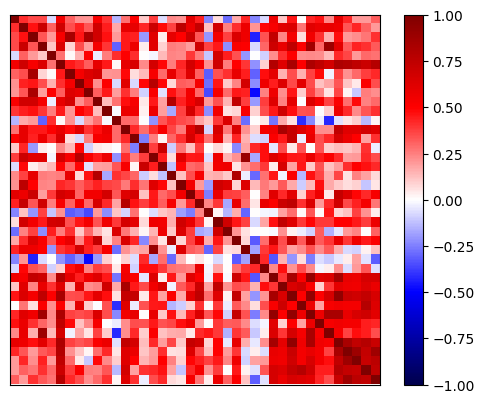

In [4]:
df_human_llm_combined1 = pd.merge(df_human_sample1, df_llm_sample, left_index=True, right_index=True, how="inner", suffixes=("_human", "_llm"))

plt.imshow(df_human_llm_combined1.corr(), cmap='seismic', vmin = -1, vmax = 1)
plt.xticks([])
plt.yticks([])

#sns.despine()
plt.colorbar()

([], [])

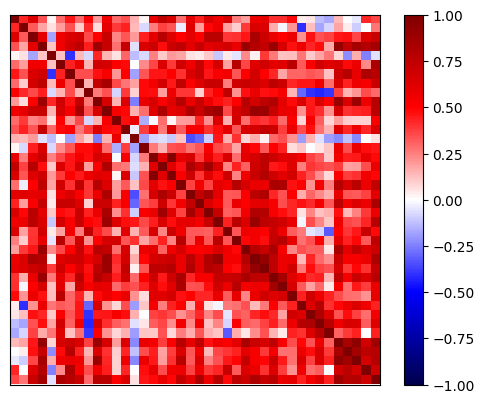

In [5]:
df_human_llm_combined2 = pd.merge(df_human_sample2, df_llm_sample, left_index=True, right_index=True, how="inner", suffixes=("_human", "_llm"))

plt.imshow(df_human_llm_combined2.corr(), cmap='seismic', vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks([])
plt.yticks([])

In [7]:
human_cols = [col for col in df_human_llm_combined1.columns if 'human' in col]
llm_cols = [col for col in df_human_llm_combined1.columns if 'corrected' in col]

# Compute the mean across these columns
df_human_llm_combined1['human_avg'] = df_human_llm_combined1[human_cols].mean(axis=1)
df_human_llm_combined1['llm_avg']   = df_human_llm_combined1[llm_cols].mean(axis=1)


In [9]:
human_cols = [col for col in df_human_llm_combined2.columns if 'human' in col]
llm_cols = [col for col in df_human_llm_combined2.columns if 'corrected' in col]

# Compute the mean across these columns
df_human_llm_combined2['human_avg'] = df_human_llm_combined2[human_cols].mean(axis=1)
df_human_llm_combined2['llm_avg']   = df_human_llm_combined2[llm_cols].mean(axis=1)


In [24]:
#df_human_llm_combined2['human_avg'] = df_human_llm_combined2[human_cols].mean(axis=1)
#df_human_llm_combined2['llm_avg']   = df_human_llm_combined2[llm_cols].mean(axis=1)

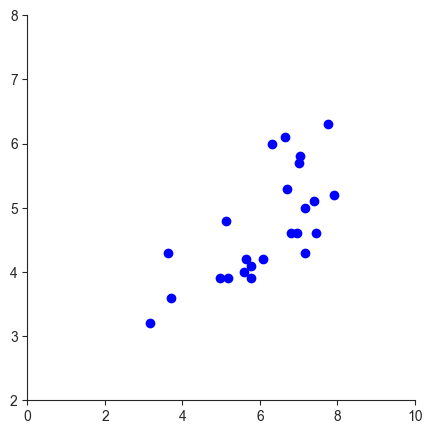

In [22]:
plt.figure(figsize = (5,5))
sns.set_style('ticks')
plt.scatter(df_human_llm_combined1['human_avg'],
            df_human_llm_combined1['llm_avg'], color = 'blue');
plt.scatter(df_human_llm_combined2['human_avg'],
            df_human_llm_combined2['llm_avg'], color = 'blue');
plt.xlim([0,10])
plt.ylim([2,8])

sns.despine()

In [39]:
np.corrcoef(  np.hstack((df_human_llm_combined1['human_avg'], df_human_llm_combined2['human_avg'])),
              np.hstack((df_human_llm_combined1['llm_avg'], df_human_llm_combined2['llm_avg'])))[0,1]

0.6927521007888355

In [45]:
df_human_ratings_average = pd.read_csv('../data/05_human_ratings/averaged_human_ratings.csv')

df_llm_ratings_average = pd.read_csv('../data/05_llm_ratings/averaged_llm_ratings_1.0.csv')
df_llm_ratings_average = df_llm_ratings_average[['Speech', 'Mean_Score']]

df_matched_average1 = pd.merge(df_human_ratings_average, df_llm_ratings_average, on="Speech", suffixes=("_human", "_llm"))

df_matched_average1[['Mean_Score_human','Mean_Score_llm']].corr()

,Mean_Score_human,Mean_Score_llm
Mean_Score_human,1.000000,0.699479
Mean_Score_llm,0.699479,1.000000


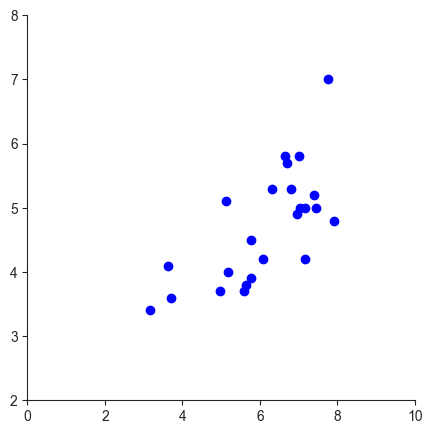

In [46]:
plt.figure(figsize = (5,5))
sns.set_style('ticks')
plt.scatter(df_matched_average1['Mean_Score_human'],
            df_matched_average1['Mean_Score_llm'], color = 'blue');

plt.xlim([0,10])
plt.ylim([2,8])

sns.despine()